In [1]:
import pandas as pd
import numpy  as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import streamlit as st
import requests
from io import StringIO
import os


# Conectar a la base de datos SQLite
conn = sqlite3.connect(r"C:\Users\maria\Documents\UCV MARY\EECA\SEMESTRE 2024-1\SEMESTRE II\COMPUTACIÓN II\TRABAJO FINAL\SALUD MENTAL EN LA INDUSTRIA TECNOLÓGICA 1.sqlite")

cur = conn.cursor()

In [2]:
# Consultar las tablas en la base de datos
consulta_ntablas = "SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;"


# Mostrar las entidades
print("Entidades en la base de datos:")
entidades = pd.read_sql_query(sql = consulta_ntablas, con = conn)
entidades

Entidades en la base de datos:


,name
0,Answer
1,Question
2,Respuestas
3,Survey


In [3]:
# Crear consulta para convertir en DF
consulta = "SELECT * FROM Respuestas;"

df_Respuestas = pd.read_sql_query(sql = consulta, con = conn)

conn.close()

In [4]:
# Filtrado del DF por desde 2016-2019 y Estados Unidos como país para realizar la Investigación
User_ID = df_Respuestas[(df_Respuestas['QuestionID'] == 3) & (df_Respuestas['AnswerText'] == 'Estados Unidos')]['UserID'].unique()

df_Investigacion1 = df_Respuestas[(df_Respuestas['UserID'].isin(User_ID)) & (df_Respuestas['SurveyID'] == 2016)]

df_Investigacion2 = df_Respuestas[(df_Respuestas['UserID'].isin(User_ID)) & (df_Respuestas['SurveyID'] == 2017)]

df_Investigacion3 = df_Respuestas[(df_Respuestas['UserID'].isin(User_ID)) & (df_Respuestas['SurveyID'] == 2018)]

df_Investigacion4 = df_Respuestas[(df_Respuestas['UserID'].isin(User_ID)) & (df_Respuestas['SurveyID'] == 2019)]

In [5]:
# Reestructuración del DF para mejor uso de Pandas
df_Investigacion1 = df_Investigacion1.groupby(['UserID', 'QuestionID'])['AnswerText'].first().reset_index()

df_Investigacion2 = df_Investigacion2.groupby(['UserID', 'QuestionID'])['AnswerText'].first().reset_index()

df_Investigacion3 = df_Investigacion3.groupby(['UserID', 'QuestionID'])['AnswerText'].first().reset_index()

df_Investigacion4 = df_Investigacion4.groupby(['UserID', 'QuestionID'])['AnswerText'].first().reset_index()

df_Investigacion1 = df_Investigacion1.pivot_table(index='UserID', columns='QuestionID', values='AnswerText', aggfunc='first')

df_Investigacion2 = df_Investigacion2.pivot_table(index='UserID', columns='QuestionID', values='AnswerText', aggfunc='first')

df_Investigacion3 = df_Investigacion3.pivot_table(index='UserID', columns='QuestionID', values='AnswerText', aggfunc='first')

df_Investigacion4 = df_Investigacion4.pivot_table(index='UserID', columns='QuestionID', values='AnswerText', aggfunc='first')

In [6]:
# Renombrar las variables 2016
print(df_Investigacion1.columns)

df_Investigacion1.columns = ['Edad', 'Género', 'País de Residencia', 'Ciudad de Residencia (EEUU)', 'Trabajo Autónomo', 'Antecedentes Heredofamiliares', 'Búsqueda de Tratamiento con un Profesional', 'Cantidad de Empleados en la Empresa', 'Beneficios Dentro de Seguro Médico', 'Problemas de Salud Mental en Entrevista Laboral', 'Conocimiento de las Opciones de Cobertura por la Empresa Actual', 'Recursos de la Empresa Para Conocer sobre la Salud Mental y Canales de Ayuda', 'Facilidad de Consulta de Baja Médica en el Trabajo', 'Comodidad para Hablar de una Enfermedad Mental con Compañeros de Trabajo', 'Comodidad para Hablar de una Enfermedad Mental con un Director/Supervisor', 'Cobertura de Salud Mental en Seguro Médico', 'Beneficios de Salud Mental de Empleos Anteriores', 'Conocimiento de las Opciones de Ayuda por el Empleo Anterior', 'Protección de Anonimato Si Se Toma Ventaja de los Recursos de Tratamiento en Empleos Anteriores', 'Disposición de Hablar de Salud Mental con un Supervisor', 'Disposición para Hablar Sobre Enfermedad Mental con Familia/Amigos', 'Seguridad de Revelar Enfermedad Mental Debido a Comentario Sobre Salud Mental de Otra Persona', 'Situación Mental Actual', '¿Alguna Vez Has Sido Diagnosticado con una Enfermedad Mental?', 'Nivel de Interferencia en el Trabajo Cuando Se Está Bajo Tratamiento', 'Nivel de Interferencia en el Trabajo Cuando No Se Está Bajo Tratamiento', 'Disposición a Revelar Enfermedad Mental a Empleados/Compañeros', 'Productividad Afectada Por Enfermedad Mental', 'Porcentaje de Tiempo Afectada Por Enfermedad Mental', '¿Has Observado o Experimentado una Respuesta Insolidaria o Mal Gestionada a un Problema de Salud Mental en tu Lugar de Trabajo Actual o Anterior?', '¿Cree que los Miembros de su Equipo/Compañeros de Trabajo le Verían de Forma más Negativa Si Supieran que Padece una Enfermedad Mental?', 'Enfermedades Mentales Diagnosticadas', 'Enfermedades Mentales No Diagnosticadas', 'Puesto de Trabajo', 'Trabajo Remoto']

# Reemplazar los NaN
df_Investigacion1 = df_Investigacion1.fillna('No respondió')

Index([  1,   2,   3,   4,   5,   6,   7,   8,  10,  12,  14,  16,  17,  18,
        19,  20,  23,  24,  27,  28,  30,  31,  33,  34,  48,  49,  53,  54,
        55,  56, 114, 115, 116, 117, 118],
      dtype='int64', name='QuestionID')


In [7]:
# Renombrar las variables 2017
print(df_Investigacion2.columns)

df_Investigacion2.columns = ['Edad', 'Género', 'País de Residencia', 'Ciudad de Residencia (EEUU)', 'Trabajo Autónomo', 'Antecedentes Heredofamiliares', 'Búsqueda de Tratamiento con un Profesional', 'Cantidad de Empleados en la Empresa', 'Beneficios Dentro de Seguro Médico', 'Problemas de Salud Mental en Entrevista Laboral', 'Conocimiento de las Opciones de Cobertura por la Empresa Actual', 'Recursos de la Empresa Para Conocer sobre la Salud Mental y Canales de Ayuda', 'Facilidad de Consulta de Baja Médica en el Trabajo', 'Comodidad para Hablar de una Enfermedad Mental con Compañeros de Trabajo', 'Comodidad para Hablar de una Enfermedad Mental con un Director/Supervisor', 'Cobertura de Salud Mental en Seguro Médico', 'Beneficios de Salud Mental de Empleos Anteriores', 'Conocimiento de las Opciones de Ayuda por el Empleo Anterior', 'Protección de Anonimato Si Se Toma Ventaja de los Recursos de Tratamiento en Empleos Anteriores', 'Disposición de Hablar de Salud Mental con un Supervisor', 'Disposición para Hablar Sobre Enfermedad Mental con Familia/Amigos', 'Seguridad de Revelar Enfermedad Mental Debido a Comentario Sobre Salud Mental de Otra Persona', 'Situación Mental Actual', '¿Alguna Vez Has Sido Diagnosticado con una Enfermedad Mental?', 'Nivel de Interferencia en el Trabajo Cuando Se Está Bajo Tratamiento', 'Nivel de Interferencia en el Trabajo Cuando No Se Está Bajo Tratamiento', 'Disposición a Revelar Enfermedad Mental a Empleados/Compañeros', 'Productividad Afectada Por Enfermedad Mental', 'Porcentaje de Tiempo Afectada Por Enfermedad Mental', '¿Has Observado o Experimentado una Respuesta Insolidaria o Mal Gestionada a un Problema de Salud Mental en tu Lugar de Trabajo Actual o Anterior?', 'Importancia a la Salud Mental (Empresa)', '¿Cómo Afectó la Relación con Alguien de tu Trabajo el Haberle Contado sobre tu Enfermedad Mental?', '¿Te Identificas Abiertamente en el Trabajo como una Persona con una Enfermedad Mental?', '¿Tu Carrera Se Ha Visto Afectada por Tener una Enfermedad Mental?', 'Si Supieran Que Padeces un Trastorno Mental, ¿Cómo Crees Que Reaccionarían los Miembros de tu Equipo/Compañeros de Trabajo?', '¿Has Observado o Experimentado una Respuesta Positiva De Compañeros/Jefes al Saber que Tienes una Enfermedad Mental?', '¿En qué Medida Cree que el Sector Tecnológico Apoya a los Empleados con Enfermedades Mentales?', 'Raza']

# Reemplazar los NaN
df_Investigacion2 = df_Investigacion2.fillna('No respondió')

Index([ 1,  2,  3,  4,  5,  6,  7,  8, 10, 12, 14, 16, 17, 18, 19, 20, 23, 24,
       27, 28, 30, 31, 33, 34, 48, 49, 53, 54, 55, 56, 65, 67, 78, 79, 81, 83,
       85, 89],
      dtype='int64', name='QuestionID')


In [8]:
# Renombrar las variables 2018
print(df_Investigacion3.columns)

df_Investigacion3.columns = ['Edad', 'Género', 'País de Residencia', 'Ciudad de Residencia (EEUU)', 'Trabajo Autónomo', 'Antecedentes Heredofamiliares', 'Búsqueda de Tratamiento con un Profesional', 'Cantidad de Empleados en la Empresa', 'Beneficios Dentro de Seguro Médico', 'Problemas de Salud Mental en Entrevista Laboral', 'Conocimiento de las Opciones de Cobertura por la Empresa Actual', 'Recursos de la Empresa Para Conocer sobre la Salud Mental y Canales de Ayuda', 'Facilidad de Consulta de Baja Médica en el Trabajo', 'Comodidad para Hablar de una Enfermedad Mental con Compañeros de Trabajo', 'Comodidad para Hablar de una Enfermedad Mental con un Director/Supervisor', 'Cobertura de Salud Mental en Seguro Médico', 'Beneficios de Salud Mental de Empleos Anteriores', 'Conocimiento de las Opciones de Ayuda por el Empleo Anterior', 'Protección de Anonimato Si Se Toma Ventaja de los Recursos de Tratamiento en Empleos Anteriores', 'Disposición de Hablar de Salud Mental con un Supervisor', 'Disposición para Hablar Sobre Enfermedad Mental con Familia/Amigos', 'Seguridad de Revelar Enfermedad Mental Debido a Comentario Sobre Salud Mental de Otra Persona', 'Situación Mental Actual', '¿Alguna Vez Has Sido Diagnosticado con una Enfermedad Mental?', 'Nivel de Interferencia en el Trabajo Cuando Se Está Bajo Tratamiento', 'Nivel de Interferencia en el Trabajo Cuando No Se Está Bajo Tratamiento', 'Disposición a Revelar Enfermedad Mental a Empleados/Compañeros', 'Productividad Afectada Por Enfermedad Mental', 'Porcentaje de Tiempo Afectada Por Enfermedad Mental', '¿Has Observado o Experimentado una Respuesta Insolidaria o Mal Gestionada a un Problema de Salud Mental en tu Lugar de Trabajo Actual o Anterior?', 'Importancia a la Salud Mental (Empresa)', '¿Cómo Afectó la Relación con Alguien de tu Trabajo el Haberle Contado sobre tu Enfermedad Mental?', '¿Te Identificas Abiertamente en el Trabajo como una Persona con una Enfermedad Mental?', '¿Tu Carrera Se Ha Visto Afectada por Tener una Enfermedad Mental?', 'Si Supieran Que Padeces un Trastorno Mental, ¿Cómo Crees Que Reaccionarían los Miembros de tu Equipo/Compañeros de Trabajo?', '¿Has Observado o Experimentado una Respuesta Positiva De Compañeros/Jefes al Saber que Tienes una Enfermedad Mental?', '¿En qué Medida Cree que el Sector Tecnológico Apoya a los Empleados con Enfermedades Mentales?', 'Raza']

# Reemplazar los NaN
df_Investigacion3 = df_Investigacion3.fillna('No respondió')

Index([ 1,  2,  3,  4,  5,  6,  7,  8, 10, 12, 14, 16, 17, 18, 19, 20, 23, 24,
       27, 28, 30, 31, 33, 34, 48, 49, 53, 54, 55, 56, 65, 67, 78, 79, 81, 83,
       85, 89],
      dtype='int64', name='QuestionID')


In [9]:
# Renombrar las variables 2019
print(df_Investigacion4.columns)

df_Investigacion4.columns = ['Edad', 'Género', 'País de Residencia', 'Ciudad de Residencia (EEUU)', 'Trabajo Autónomo', 'Antecedentes Heredofamiliares', 'Búsqueda de Tratamiento con un Profesional', 'Cantidad de Empleados en la Empresa', 'Beneficios Dentro de Seguro Médico', 'Problemas de Salud Mental en Entrevista Laboral', 'Conocimiento de las Opciones de Cobertura por la Empresa Actual', 'Recursos de la Empresa Para Conocer sobre la Salud Mental y Canales de Ayuda', 'Facilidad de Consulta de Baja Médica en el Trabajo', 'Comodidad para Hablar de una Enfermedad Mental con Compañeros de Trabajo', 'Comodidad para Hablar de una Enfermedad Mental con un Director/Supervisor', 'Cobertura de Salud Mental en Seguro Médico', 'Beneficios de Salud Mental de Empleos Anteriores', 'Conocimiento de las Opciones de Ayuda por el Empleo Anterior', 'Protección de Anonimato Si Se Toma Ventaja de los Recursos de Tratamiento en Empleos Anteriores', 'Disposición de Hablar de Salud Mental con un Supervisor', 'Disposición para Hablar Sobre Enfermedad Mental con Familia/Amigos', 'Seguridad de Revelar Enfermedad Mental Debido a Comentario Sobre Salud Mental de Otra Persona', 'Situación Mental Actual', '¿Alguna Vez Has Sido Diagnosticado con una Enfermedad Mental?', 'Nivel de Interferencia en el Trabajo Cuando Se Está Bajo Tratamiento', 'Nivel de Interferencia en el Trabajo Cuando No Se Está Bajo Tratamiento', 'Disposición a Revelar Enfermedad Mental a Empleados/Compañeros', 'Productividad Afectada Por Enfermedad Mental', 'Porcentaje de Tiempo Afectada Por Enfermedad Mental', '¿Has Observado o Experimentado una Respuesta Insolidaria o Mal Gestionada a un Problema de Salud Mental en tu Lugar de Trabajo Actual o Anterior?', 'Importancia a la Salud Mental (Empresa)', '¿Cómo Afectó la Relación con Alguien de tu Trabajo el Haberle Contado sobre tu Enfermedad Mental?', '¿Te Identificas Abiertamente en el Trabajo como una Persona con una Enfermedad Mental?', '¿Tu Carrera Se Ha Visto Afectada por Tener una Enfermedad Mental?', 'Si Supieran Que Padeces un Trastorno Mental, ¿Cómo Crees Que Reaccionarían los Miembros de tu Equipo/Compañeros de Trabajo?', '¿Has Observado o Experimentado una Respuesta Positiva De Compañeros/Jefes al Saber que Tienes una Enfermedad Mental?', '¿En qué Medida Cree que el Sector Tecnológico Apoya a los Empleados con Enfermedades Mentales?', 'Raza']

# Reemplazar los NaN
df_Investigacion4 = df_Investigacion4.fillna('No respondió')

Index([ 1,  2,  3,  4,  5,  6,  7,  8, 10, 12, 14, 16, 17, 18, 19, 20, 23, 24,
       27, 28, 30, 31, 33, 34, 48, 49, 53, 54, 55, 56, 65, 67, 78, 79, 81, 83,
       85, 89],
      dtype='int64', name='QuestionID')


In [10]:
# Carpeta donde deseas guardar los archivos CSV
output_folder = r"C:\Users\maria\Documents\UCV MARY\EECA\SEMESTRE 2024-1\SEMESTRE II\COMPUTACIÓN II\TRABAJO FINAL\CSV"

# Crear la carpeta si no existe
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Guardar los archivos CSV en la carpeta especificada
df_Investigacion1.to_csv(os.path.join(output_folder, 'Investigacion1.csv'), index=False)
df_Investigacion2.to_csv(os.path.join(output_folder, 'Investigacion2.csv'), index=False)
df_Investigacion3.to_csv(os.path.join(output_folder, 'Investigacion3.csv'), index=False)
df_Investigacion4.to_csv(os.path.join(output_folder, 'Investigacion4.csv'), index=False)

In [11]:
# HTML
# Título de la aplicación
st.title("Problemáticas y Estigmas de las Enfermedades Mentales en la Industria Tecnológica Estadounidense 2016-2019")

# Contenido de la página 1
st.header("Introducción")
st.write("Información de la Data Suministrada.")

# Contenido de la página 2
st.header("Visualización de los Datos")
st.write("Información de la Data Suministrada.")

@st.cache
def load_csv_from_github(url):
    response = requests.get(url)
    if response.status_code == 200:
        return pd.read_csv(StringIO(response.text))
    else:
        st.error("Failed to load data from GitHub.")
        return None

# URLs of CSV files in GitHub repository
urls = {
    '2016': 'https://raw.githubusercontent.com/Marizaf23/Analisis-Estadistico-Salud-Mental-Tecnologia/95f59adcc416732d98f3b9aa494eb78cadd12c0d/CSV/Investigacion1.csv',
    '2017': 'https://raw.githubusercontent.com/Marizaf23/Analisis-Estadistico-Salud-Mental-Tecnologia/95f59adcc416732d98f3b9aa494eb78cadd12c0d/CSV/Investigacion2.csv',
    '2018': 'https://raw.githubusercontent.com/Marizaf23/Analisis-Estadistico-Salud-Mental-Tecnologia/95f59adcc416732d98f3b9aa494eb78cadd12c0d/CSV/Investigacion3.csv',
    '2019': 'https://raw.githubusercontent.com/Marizaf23/Analisis-Estadistico-Salud-Mental-Tecnologia/95f59adcc416732d98f3b9aa494eb78cadd12c0d/CSV/Investigacion4.csv'
}

# Load CSV files from GitHub
df_2016 = load_csv_from_github(urls['2016'])
df_2017 = load_csv_from_github(urls['2017'])
df_2018 = load_csv_from_github(urls['2018'])
df_2019 = load_csv_from_github(urls['2019'])

# Crea un selectbox con las opciones
option = st.selectbox('Año de Encuesta:', ['2016', '2017', '2018', '2019'])

# Muestra el DataFrame correspondiente según la opción seleccionada
if option == '2016':
    st.dataframe(df_2016)
elif option == '2017':
    st.dataframe(df_2017)
elif option == '2018':
    st.dataframe(df_2018)
elif option == '2019':
    st.dataframe(df_2019)


2024-06-25 17:07:47.917 
  command:

    streamlit run C:\Users\maria\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-06-25 17:07:47.919 
`st.cache` is deprecated and will be removed soon. Please use one of Streamlit's new caching commands, `st.cache_data` or `st.cache_resource`.
More information [in our docs](https://docs.streamlit.io/develop/concepts/architecture/caching).

**Note**: The behavior of `st.cache` was updated in Streamlit 1.36 to the new caching logic used by `st.cache_data` and `st.cache_resource`.
This might lead to some problems or unexpected behavior in certain edge cases.

2024-06-25 17:07:47.921 No runtime found, using MemoryCacheStorageManager
2024-06-25 17:07:47.923 No runtime found, using MemoryCacheStorageManager
2024-06-25 17:07:49.707 Session state does not function when running a script without `streamlit run`


In [12]:
# PREGUNTA #1
#¿Cuántas personas en la industria tecnológica tienen una enfermedad mental diagnosticada y, dentro de este grupo, existe algún antecedente heredofamiliar dentro de este ámbito?

# Crea un selectbox con las opciones
option = st.selectbox('Año de Encuesta:', ['Todos','2016', '2017', '2018', '2019'])

if option == '2016':

    #Crear la tabla bivariante con pandas
    Pregunta2016_1 = pd.crosstab(df_2016['¿Alguna Vez Has Sido Diagnosticado con una Enfermedad Mental?'], 
                        df_2016['Antecedentes Heredofamiliares'], 
                        margins=True, 
                        margins_name='Total')

    # Renombrar el índice
    Pregunta2016_1.index.name = "Antecedentes Heredofamiliares"
    
    # Agregar una fila debajo de los títulos de las columnas 
    Pregunta2016_1.loc['Enfermedad Mental'] = ['', '', '', '']

    Pregunta2016_1 = Pregunta2016_1.reindex(['Enfermedad Mental'] + [i for i in Pregunta2016_1.index if i != 'Enfermedad Mental'])
    
    Pregunta2016_1.rename(columns={'index': 'Enfermedad Mental'})

    st.dataframe(Pregunta2016_1, width=1500, height=177)


    # Crear la figura
    fig = go.Figure()
    fig.add_trace(go.Bar(
        y=['No tengo antecedentes heredofamiliares', 'No conozco mis antecedentes familiares', 'Tengo antecedentes familiares'],
        x=[170, 76, 120],
        name='No tengo enfermedades mentales',
        orientation='h',
        marker=dict(
        color='rgb(77, 148, 255)',
        line=dict(color='rgb(77, 148, 255)', width=2)
        )
        ))
    fig.add_trace(go.Bar(
        y=['No tengo antecedentes heredofamiliares', 'No conozco mis antecedentes familiares', 'Tengo antecedentes familiares'],
        x=[70, 70, 333],
        name='Tengo enfermedades mentales',
        orientation='h',
        marker=dict(
        color='rgb(0, 102, 255)',
        line=dict(color='rgb(0, 102, 255)', width=2)
        )
        ))

    fig.update_layout(
    barmode='stack',
    font=dict(
        color='rgb(0, 0, 0)'
        )
        )

    # Mostrar la figura en Streamlit
    st.plotly_chart(fig, use_container_width=True)

elif option == '2017':

    #Crear la tabla bivariante con pandas
    Pregunta2017_1 = pd.crosstab(df_2017['¿Alguna Vez Has Sido Diagnosticado con una Enfermedad Mental?'], 
                        df_2017['Antecedentes Heredofamiliares'], 
                        margins=True, 
                        margins_name='Total')

    # Renombrar el índice
    Pregunta2017_1.index.name = "Antecedentes Heredofamiliares"
    
    # Agregar una fila debajo de los títulos de las columnas 
    Pregunta2017_1.loc['Enfermedad Mental'] = ['', '', '', '']

    Pregunta2017_1 = Pregunta2017_1.reindex(['Enfermedad Mental'] + [i for i in Pregunta2017_1.index if i != 'Enfermedad Mental'])
    
    Pregunta2017_1.rename(columns={'index': 'Enfermedad Mental'})

    Pregunta2017_1 = Pregunta2017_1.reindex(['Enfermedad Mental'] + [i for i in Pregunta2017_1.index if i not in ['Enfermedad Mental', 'No respondió', 'Total']] + ['No respondió'] + ['Total'])
    
    st.dataframe(Pregunta2017_1, width=800, height=212)

    # Crear la figura
    fig2017_1 = go.Figure()

    fig2017_1.add_trace(go.Bar(
        y=['No tengo antecedentes heredofamiliares', 'No conozco mis antecedentes familiares', 'Tengo antecedentes familiares'],
        x=[0, 1, 3],
        name='No tengo enfermedades mentales',
        orientation='h',
        marker=dict(
        color='rgb(0, 61, 153)',
        line=dict(color='rgb(0, 61, 153)', width=2)
        )   
        ))

    fig2017_1.add_trace(go.Bar(
        y=['No tengo antecedentes heredofamiliares', 'No conozco mis antecedentes familiares', 'Tengo antecedentes familiares'],
        x=[26, 55, 163],
        name='Tengo enfermedades mentales',
        orientation='h',
        marker=dict(
        color='rgb(77, 148, 255)',
        line=dict(color='rgb(77, 148, 255)', width=2)
        )
        ))

    fig2017_1.add_trace(go.Bar(
        y=['No tengo antecedentes heredofamiliares', 'No conozco mis antecedentes familiares', 'Tengo antecedentes familiares'],
        x=[85, 79, 85],
        name='No respondio',
        orientation='h',
    marker=dict(
        color='rgb(0, 102, 255)',
        line=dict(color='rgb(0, 102, 255)', width=2)
        )
        ))

    fig2017_1.update_layout(barmode='stack')

    # Mostrar la figura en Streamlit
    st.plotly_chart(fig2017_1, use_container_width=True)

elif option == '2018':
    
    #Crear la tabla bivariante con pandas
    Pregunta2018_1 = pd.crosstab(df_2018['¿Alguna Vez Has Sido Diagnosticado con una Enfermedad Mental?'], 
                        df_2018['Antecedentes Heredofamiliares'], 
                        margins=True, 
                        margins_name='Total')

    # Renombrar el índice
    Pregunta2018_1.index.name = "Antecedentes Heredofamiliares"
    
    # Agregar una fila debajo de los títulos de las columnas 
    Pregunta2018_1.loc['Enfermedad Mental'] = ['', '', '', '']

    Pregunta2018_1 = Pregunta2018_1.reindex(['Enfermedad Mental'] + [i for i in Pregunta2018_1.index if i != 'Enfermedad Mental'])
    
    Pregunta2018_1.rename(columns={'index': 'Enfermedad Mental'})

    Pregunta2018_1 = Pregunta2018_1.reindex(['Enfermedad Mental'] + [i for i in Pregunta2018_1.index if i not in ['Enfermedad Mental', 'No respondió', 'Total']] + ['No respondió'] + ['Total'])
    
    st.dataframe(Pregunta2018_1, width=800, height=212)

    # Crear la figura
    fig2018_1 = go.Figure()

    fig2018_1.add_trace(go.Bar(
        y=['No tengo antecedentes heredofamiliares', 'No conozco mis antecedentes familiares', 'Tengo antecedentes familiares'],
        x=[1, 0, 1],
        name='No tengo enfermedades mentales',
        orientation='h',
        marker=dict(
        color='rgb(0, 61, 153)',
        line=dict(color='rgb(0, 61, 153)', width=2)
        )   
        ))

    fig2018_1.add_trace(go.Bar(
        y=['No tengo antecedentes heredofamiliares', 'No conozco mis antecedentes familiares', 'Tengo antecedentes familiares'],
        x=[11, 35, 113],
        name='Tengo enfermedades mentales',
        orientation='h',
        marker=dict(
        color='rgb(77, 148, 255)',
        line=dict(color='rgb(77, 148, 255)', width=2)
        )
        ))

    fig2018_1.add_trace(go.Bar(
        y=['No tengo antecedentes heredofamiliares', 'No conozco mis antecedentes familiares', 'Tengo antecedentes familiares'],
        x=[59, 34, 58],
        name='No respondio',
        orientation='h',
    marker=dict(
        color='rgb(0, 102, 255)',
        line=dict(color='rgb(0, 102, 255)', width=2)
        )
        ))

    fig2018_1.update_layout(barmode='stack')

    # Mostrar la figura en Streamlit
    st.plotly_chart(fig2018_1, use_container_width=True)

elif option == '2019':

    #Crear la tabla bivariante con pandas
    Pregunta2019_1 = pd.crosstab(df_2019['¿Alguna Vez Has Sido Diagnosticado con una Enfermedad Mental?'], 
                        df_2019['Antecedentes Heredofamiliares'], 
                        margins=True, 
                        margins_name='Total')

    # Renombrar el índice
    Pregunta2019_1.index.name = "Antecedentes Heredofamiliares"
    
    # Agregar una fila debajo de los títulos de las columnas 
    Pregunta2019_1.loc['Enfermedad Mental'] = ['', '', '', '']

    Pregunta2019_1 = Pregunta2019_1.reindex(['Enfermedad Mental'] + [i for i in Pregunta2019_1.index if i != 'Enfermedad Mental'])
    
    Pregunta2019_1.rename(columns={'index': 'Enfermedad Mental'})

    Pregunta2019_1 = Pregunta2019_1.reindex(['Enfermedad Mental'] + [i for i in Pregunta2019_1.index if i not in ['Enfermedad Mental', 'No respondió', 'Total']] + ['No respondió'] + ['Total'])

    st.dataframe(Pregunta2019_1, width=800, height=212)

        # Crear la figura
    fig2019_1 = go.Figure()

    fig2019_1.add_trace(go.Bar(
        y=['No tengo antecedentes heredofamiliares', 'No conozco mis antecedentes familiares', 'Tengo antecedentes familiares'],
        x=[0, 1, 0],
        name='No tengo enfermedades mentales',
        orientation='h',
        marker=dict(
        color='rgb(0, 61, 153)',
        line=dict(color='rgb(0, 61, 153)', width=2)
        )   
        ))

    fig2019_1.add_trace(go.Bar(
        y=['No tengo antecedentes heredofamiliares', 'No conozco mis antecedentes familiares', 'Tengo antecedentes familiares'],
        x=[9, 25, 72],
        name='Tengo enfermedades mentales',
        orientation='h',
        marker=dict(
        color='rgb(77, 148, 255)',
        line=dict(color='rgb(77, 148, 255)', width=2)
        )
        ))

    fig2019_1.add_trace(go.Bar(
        y=['No tengo antecedentes heredofamiliares', 'No conozco mis antecedentes familiares', 'Tengo antecedentes familiares'],
        x=[35, 19, 43],
        name='No respondio',
        orientation='h',
    marker=dict(
        color='rgb(0, 102, 255)',
        line=dict(color='rgb(0, 102, 255)', width=2)
        )
        ))

    fig2019_1.update_layout(barmode='stack')

    # Mostrar la figura en Streamlit
    st.plotly_chart(fig2019_1, use_container_width=True)

In [13]:
Pregunta2016_1 = pd.crosstab(df_2016['¿Alguna Vez Has Sido Diagnosticado con una Enfermedad Mental?'], 
                        df_2016['Antecedentes Heredofamiliares'], 
                        margins=True, 
                        margins_name='Total')

    # Renombrar el índice
Pregunta2016_1.index.name = "Antecedentes Heredofamiliares"
    
    # Agregar una fila debajo de los títulos de las columnas 
Pregunta2016_1.loc['Enfermedad Mental'] = ['', '', '', '']

Pregunta2016_1 = Pregunta2016_1.reindex(['Enfermedad Mental'] + [i for i in Pregunta2016_1.index if i != 'Enfermedad Mental'])
    
Pregunta2016_1.rename(columns={'index': 'Enfermedad Mental'})

Antecedentes Heredofamiliares,No,No sé,Si,Total
Antecedentes Heredofamiliares,,,,
Enfermedad Mental,,,,
No,170,76,120,366
Si,70,70,333,473
Total,240,146,453,839


In [14]:
#Crear la tabla bivariante con pandas
Pregunta2017_1 = pd.crosstab(df_2017['¿Alguna Vez Has Sido Diagnosticado con una Enfermedad Mental?'], 
                        df_2017['Antecedentes Heredofamiliares'], 
                        margins=True, 
                        margins_name='Total')

    # Renombrar el índice
Pregunta2017_1.index.name = "Antecedentes Heredofamiliares"
    
    # Agregar una fila debajo de los títulos de las columnas 
Pregunta2017_1.loc['Enfermedad Mental'] = ['', '', '', '']

Pregunta2017_1 = Pregunta2017_1.reindex(['Enfermedad Mental'] + [i for i in Pregunta2017_1.index if i != 'Enfermedad Mental'])
    
Pregunta2017_1.rename(columns={'index': 'Enfermedad Mental'})

Pregunta2017_1 = Pregunta2017_1.reindex(['Enfermedad Mental'] + [i for i in Pregunta2017_1.index if i not in ['Enfermedad Mental', 'No respondió', 'Total']] + ['No respondió'] + ['Total'])
    

In [15]:
#Crear la tabla bivariante con pandas
Pregunta2018_1 = pd.crosstab(df_2018['¿Alguna Vez Has Sido Diagnosticado con una Enfermedad Mental?'], 
                        df_2018['Antecedentes Heredofamiliares'], 
                        margins=True, 
                        margins_name='Total')

    # Renombrar el índice
Pregunta2018_1.index.name = "Antecedentes Heredofamiliares"
    
    # Agregar una fila debajo de los títulos de las columnas 
Pregunta2018_1.loc['Enfermedad Mental'] = ['', '', '', '']

Pregunta2018_1 = Pregunta2018_1.reindex(['Enfermedad Mental'] + [i for i in Pregunta2018_1.index if i != 'Enfermedad Mental'])
    
Pregunta2018_1.rename(columns={'index': 'Enfermedad Mental'})

Pregunta2018_1 = Pregunta2018_1.reindex(['Enfermedad Mental'] + [i for i in Pregunta2018_1.index if i not in ['Enfermedad Mental', 'No respondió', 'Total']] + ['No respondió'] + ['Total'])
    

In [16]:
#Crear la tabla bivariante con pandas
Pregunta2019_1 = pd.crosstab(df_2019['¿Alguna Vez Has Sido Diagnosticado con una Enfermedad Mental?'], 
                        df_2019['Antecedentes Heredofamiliares'], 
                        margins=True, 
                        margins_name='Total')

    # Renombrar el índice
Pregunta2019_1.index.name = "Antecedentes Heredofamiliares"
    
    # Agregar una fila debajo de los títulos de las columnas 
Pregunta2019_1.loc['Enfermedad Mental'] = ['', '', '', '']

Pregunta2019_1 = Pregunta2019_1.reindex(['Enfermedad Mental'] + [i for i in Pregunta2019_1.index if i != 'Enfermedad Mental'])
    
Pregunta2019_1.rename(columns={'index': 'Enfermedad Mental'})

Pregunta2019_1 = Pregunta2019_1.reindex(['Enfermedad Mental'] + [i for i in Pregunta2019_1.index if i not in ['Enfermedad Mental', 'No respondió', 'Total']] + ['No respondió'] + ['Total'])


In [136]:

# Unir las tablas asignándole el año correspondiente
dfs = [Pregunta2016_1.assign(Año=2016), 
       Pregunta2017_1.assign(Año=2017), 
       Pregunta2018_1.assign(Año=2018), 
       Pregunta2019_1.assign(Año= 2019)]

# Concatenar los DataFrames
dfs_merged = pd.concat(dfs, ignore_index=True)

# Renombrar el index
dfs_merged.index = [None, 'No', 'Si', 'Total', None, 'No', 'Si', 'No respondió', 
                    'Total', None, 'No', 'Si', 'No respondió', 'Total', None, 
                    'No', 'Si', 'No respondió', 'Total']

# Eliminar los None y Total
dfs_merged.index = [i if i is not None else 'drop' for i in dfs_merged.index]
dfs_merged.drop(index='drop', inplace=True)

dfs_merged = dfs_merged[['Total', 'Año']]

# Resetear el índice y convertirlo en una columna
dfs_merged.reset_index(inplace=True)

# Renombrar la columna del índice
dfs_merged = dfs_merged.rename(columns={'index': 'Variable'})

# Pivotear la tabla
df_pivot = dfs_merged.pivot(index='Año', columns='Variable', values='Total')
df_pivot.fillna(0, inplace=True)
df_pivot = df_pivot[["No", "Si", "No respondió", "Total"]]

df_porcentajes = df_pivot.apply(lambda x: x / x['Total'] * 100, axis=1)

# Renombrar las columnas
df_porcentajes.columns = [f"{col} %" for col in df_porcentajes.columns]

# Eliminar la columna Total
df_porcentajes.drop('Total %', axis=1, inplace=True)

# Round the numbers to the nearest integer
df_porcentajes = df_porcentajes.apply(lambda x: x.round().astype(int))



C:\Users\maria\AppData\Local\Temp\ipykernel_12612\172855167.py:29: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



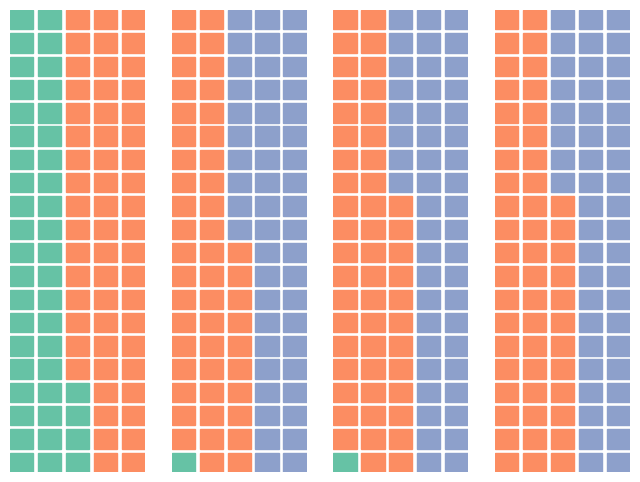

In [141]:
import matplotlib.pyplot as plt
from pywaffle import Waffle

data = {
    2016: [366, 473, 0],
    2017: [4, 244, 249],
    2018: [2, 159, 151],
    2019: [1, 106, 97],

}

df = pd.DataFrame(data,
                  index=['No tengo enfermedades mentales', 'Tengo enfermedades mentales', 'No respondió'])

number_of_bars = len(df.columns)

# Init the whole figure and axes
fig, axs = plt.subplots(nrows=1,
                        ncols=number_of_bars,
                        figsize=(8,6),)

# Iterate over each bar and create it
for i,ax in enumerate(axs):
    
    col_name = df.columns[i]
    values = df[col_name] # values from the i-th column
    
    Waffle.make_waffle(
        ax=ax,  # pass axis to make_waffle 
        rows=20,
        columns=5,
        values=values,
    )

plt.show()


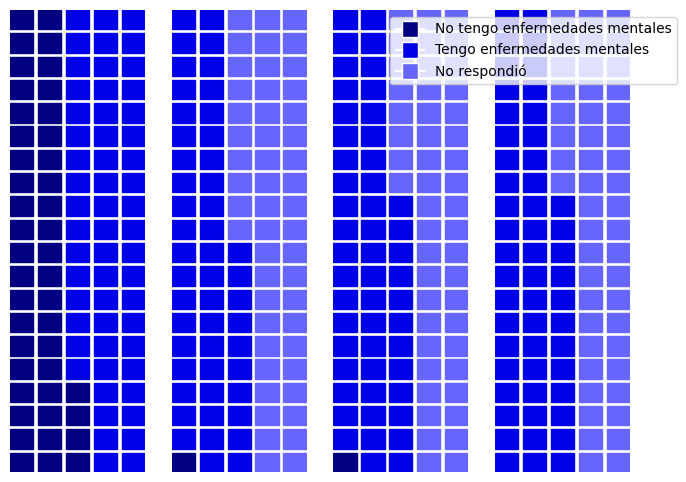

In [146]:
import matplotlib.pyplot as plt
from pywaffle import Waffle
import pandas as pd

data = {
    2016: [366, 473, 0],
    2017: [4, 244, 249],
    2018: [2, 159, 151],
    2019: [1, 106, 97],

}

df = pd.DataFrame(data,
                  index=['No tengo enfermedades mentales', 'Tengo enfermedades mentales', 'No respondió'])

number_of_bars = len(df.columns)

# Init the whole figure and axes
fig, axs = plt.subplots(nrows=1,
                        ncols=number_of_bars,
                        figsize=(8,6),)

# Define the colors
colors = ['#000080', '#0000e6', '#6666ff']  # different shades of blue

# Iterate over each bar and create it
for i,ax in enumerate(axs):
    
    col_name = df.columns[i]
    values = df[col_name]  # values from the i-th column
    
    Waffle.make_waffle(
        ax=ax,  # pass axis to make_waffle 
        rows=20,
        columns=5,
        values=values,
        colors=colors  # pass the colors
    )

# Create a legend
legend_handles = [plt.Line2D([0], [0], marker='s', color='w', label='No tengo enfermedades mentales', markerfacecolor=colors[0], markersize=12),
                  plt.Line2D([0], [0], marker='s', color='w', label='Tengo enfermedades mentales', markerfacecolor=colors[1], markersize=12),
                  plt.Line2D([0], [0], marker='s', color='w', label='No respondió', markerfacecolor=colors[2], markersize=12)]

plt.legend(handles=legend_handles, loc='upper right', bbox_to_anchor=(1.4, 1))

plt.show()

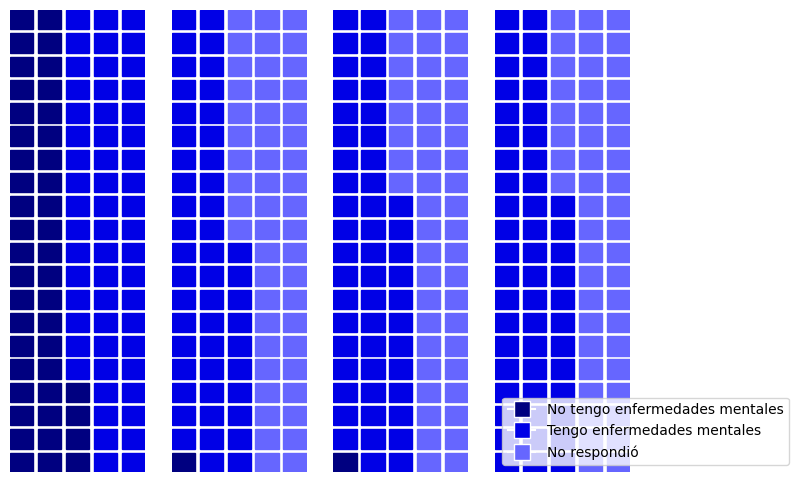

In [149]:
import matplotlib.pyplot as plt
from pywaffle import Waffle
import pandas as pd

data = {
    2016: [366, 473, 0],
    2017: [4, 244, 249],
    2018: [2, 159, 151],
    2019: [1, 106, 97],

}

df = pd.DataFrame(data,
                  index=['No tengo enfermedades mentales', 'Tengo enfermedades mentales', 'No respondió'])

number_of_bars = len(df.columns)

# Init the whole figure and axes
fig, axs = plt.subplots(nrows=1,
                        ncols=number_of_bars,
                        figsize=(8,6),)

# Define the colors
colors = ['#000080', '#0000e6', '#6666ff']  # different shades of blue

# Iterate over each bar and create it
for i,ax in enumerate(axs):
    
    col_name = df.columns[i]
    values = df[col_name]  # values from the i-th column
    
    Waffle.make_waffle(
        ax=ax,  # pass axis to make_waffle 
        rows=20,
        columns=5,
        values=values,
        colors=colors  # pass the colors
    )

# Create a legend
legend_handles = [plt.Line2D([0], [0], marker='s', color='w', label='No tengo enfermedades mentales', markerfacecolor=colors[0], markersize=12),
                  plt.Line2D([0], [0], marker='s', color='w', label='Tengo enfermedades mentales', markerfacecolor=colors[1], markersize=12),
                  plt.Line2D([0], [0], marker='s', color='w', label='No respondió', markerfacecolor=colors[2], markersize=12)]

plt.legend(handles=legend_handles, loc='lower left', borderaxespad=0.5)

plt.show()

C:\Users\maria\AppData\Local\Temp\ipykernel_12612\3252102138.py:47: UserWarning:

Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations



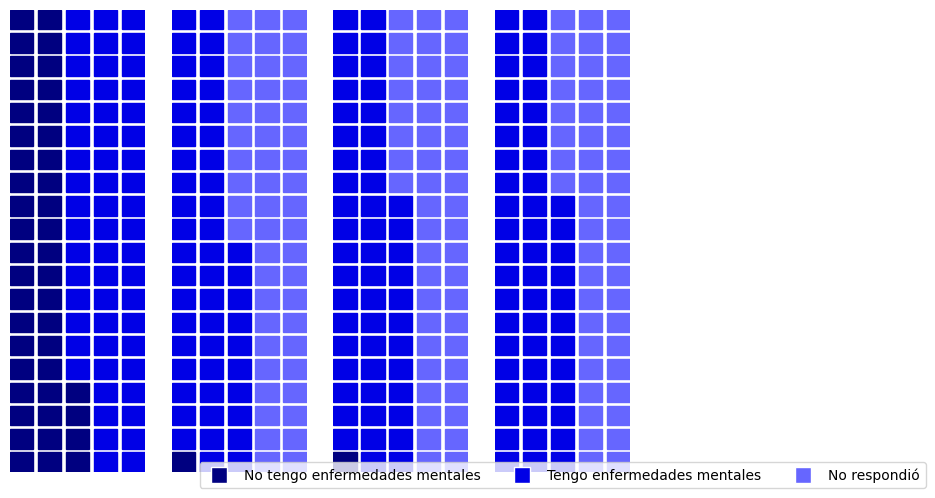

In [151]:
import matplotlib.pyplot as plt
from pywaffle import Waffle
import pandas as pd

data = {
    2016: [366, 473, 0],
    2017: [4, 244, 249],
    2018: [2, 159, 151],
    2019: [1, 106, 97],

}

df = pd.DataFrame(data,
                  index=['No tengo enfermedades mentales', 'Tengo enfermedades mentales', 'No respondió'])

number_of_bars = len(df.columns)

# Init the whole figure and axes
fig, axs = plt.subplots(nrows=1,
                        ncols=number_of_bars,
                        figsize=(8,6),)

# Define the colors
colors = ['#000080', '#0000e6', '#6666ff']  # different shades of blue

# Iterate over each bar and create it
for i,ax in enumerate(axs):
    
    col_name = df.columns[i]
    values = df[col_name]  # values from the i-th column
    
    Waffle.make_waffle(
        ax=ax,  # pass axis to make_waffle 
        rows=20,
        columns=5,
        values=values,
        colors=colors  # pass the colors
    )

# Create a legend
legend_handles = [plt.Line2D([0], [0], marker='s', color='w', label='No tengo enfermedades mentales', markerfacecolor=colors[0], markersize=12),
                  plt.Line2D([0], [0], marker='s', color='w', label='Tengo enfermedades mentales', markerfacecolor=colors[1], markersize=12),
                  plt.Line2D([0], [0], marker='s', color='w', label='No respondió', markerfacecolor=colors[2], markersize=12)]

plt.legend(handles=legend_handles, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=3)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # adjust the layout so the legend doesn't overlap with the plot

plt.show()

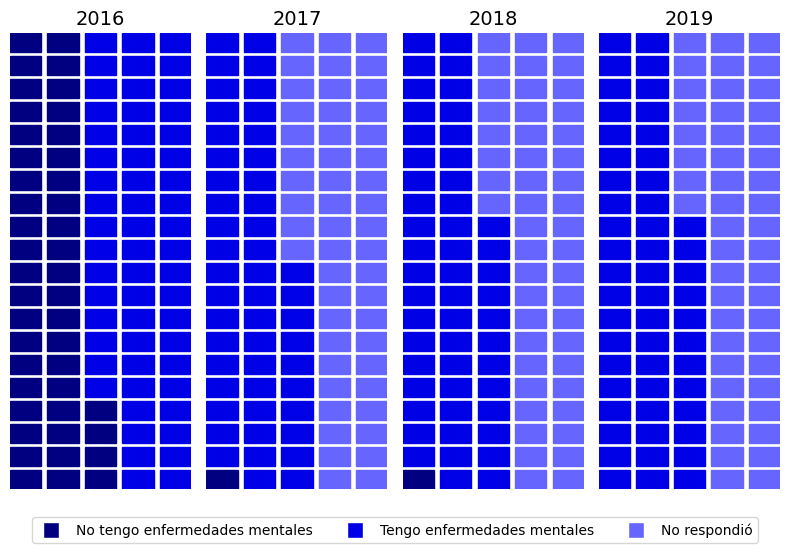

In [169]:
import matplotlib.pyplot as plt
from pywaffle import Waffle
import pandas as pd

data_total1 = {
    2016: [366, 473, 0],
    2017: [4, 244, 249],
    2018: [2, 159, 151],
    2019: [1, 106, 97],

}

df_total1 = pd.DataFrame(data_total1,
                  index=['No tengo enfermedades mentales', 'Tengo enfermedades mentales', 'No respondió'])

number_of_bars = len(df_total1.columns)

# Init the whole figure and axes
fig_total1, axs = plt.subplots(nrows=1,
                        ncols=number_of_bars,
                        figsize=(8,6),)

# Define the colors
colors = ['#000033', '#0000e6', '#6666ff']  # different shades of blue

# Iterate over each bar and create it
for i,ax in enumerate(axs):
    
    col_name = df_total1.columns[i]
    values = df_total1[col_name]  # values from the i-th column
    
    Waffle.make_waffle(
        ax=ax,  # pass axis to make_waffle 
        rows=20,
        columns=5,
        values=values,
        colors=colors  # pass the colors
    )

    # Add year label above each waffle
    ax.set_title(str(col_name), fontsize=14)

# Create a legend
legend_handles = [plt.Line2D([0], [0], marker='s', color='w', label='No tengo enfermedades mentales', markerfacecolor=colors[0], markersize=12),
                  plt.Line2D([0], [0], marker='s', color='w', label='Tengo enfermedades mentales', markerfacecolor=colors[1], markersize=12),
                  plt.Line2D([0], [0], marker='s', color='w', label='No respondió', markerfacecolor=colors[2], markersize=12)]

fig_total1.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.5, -0.01), ncol=3) # adjust the layout so the legend doesn't overlap with the plot

plt.tight_layout(rect=[0, 0, 1, 0.85])  # adjust the layout so the legend doesn't overlap with the plot

plt.show()

In [ ]:
#PREGUNTA 3

# Assuming 'df_Investigacion1' is your DataFrame
filtered_df = df_Investigacion1[df_Investigacion1['Situación Mental Actual'] == 'Si']

# Group by UserID and count the occurrences
grouped_df = filtered_df.groupby('UserID').size().reset_index(name='Cantidad de Empleados en la Empresa')

# Merge the counts back to the original DataFrame
resultado_df = df_Investigacion1.merge(grouped_df, on='UserID', how='left')

# Extract relevant columns and rename 'Cantidad de Empleados en la Empresa'
new_df = resultado_df[['Situación Mental Actual', 'Cantidad de Empleados en la Empresa_x']].copy()

# Filter new_df to only include rows where 'Situación Mental Actual' is 'Si'
new_df = new_df[new_df['Situación Mental Actual'] == 'Si']

counts = new_df['Cantidad de Empleados en la Empresa_x'].value_counts()
print(counts)

counts = new_df['Cantidad de Empleados en la Empresa_x'].value_counts()
print(counts)


counts_df = counts.to_frame('Cantidad de Personas con Enfermedad Mental dentro de la Empresa')
counts_df['Porcentaje'] = (counts / counts.sum()) * 100
counts_df['Porcentaje'] = counts_df['Porcentaje'].round(2)
# Agregar fila con el total
counts_df.loc['Total'] = [counts.sum(), 100.00]
print(counts_df)

#df_Investigacion2

# Assuming 'df_Investigacion2' is your DataFrame
filtered_df2 = df_Investigacion2[df_Investigacion2['Situación Mental Actual'] == 'Si']

# Group by UserID and count the occurrences
grouped_df2 = filtered_df2.groupby('UserID').size().reset_index(name='Cantidad de Empleados en la Empresa')

# Merge the counts back to the original DataFrame
resultado_df2 = df_Investigacion2.merge(grouped_df2, on='UserID', how='left')

# Extract relevant columns and rename 'Cantidad de Empleados en la Empresa'
new2_df = resultado2_df[['Situación Mental Actual', 'Cantidad de Empleados en la Empresa']].copy()

# Filter new_df to only include rows where 'Situación Mental Actual' is 'Si' or 'Seguramente si'
new2_df = new2_df[(new2_df['Situación Mental Actual'] == 'Si') | (new2_df['Situación Mental Actual'] == 'Seguramente si')]

counts2 = new2_df['Cantidad de Empleados en la Empresa'].value_counts()
print(counts2)

counts2_df = counts2.to_frame('Cantidad de Personas con Enfermedad Mental dentro de la Empresa')
counts2_df['Porcentaje'] = (counts2 / counts2.sum()) * 100
counts2_df['Porcentaje'] = counts2_df['Porcentaje'].round(2)
# Agregar fila con el total
counts2_df.loc['Total'] = [counts2.sum(), 100.00]
print(counts2_df)



#df_Investigacion3
# Assuming 'df_Investigacion3' is your DataFrame
filtered_df3 = df_Investigacion3[df_Investigacion3['Situación Mental Actual'] == 'Si']

# Group by UserID and count the occurrences
grouped_df3 = filtered_df3.groupby('UserID').size().reset_index(name='Cantidad de Empleados en la Empresa')

# Merge the counts back to the original DataFrame
resultado_df3 = df_Investigacion3.merge(grouped_df3, on='UserID', how='left')

# Extract relevant columns and rename 'Cantidad de Empleados en la Empresa'
new3_df = resultado_df3[['Situación Mental Actual', 'Cantidad de Empleados en la Empresa_x']].copy()

# Filter new_df to only include rows where 'Situación Mental Actual' is 'Si' or 'Seguramente si'
new3_df = new3_df[(new3_df['Situación Mental Actual'] == 'Si') | (new3_df['Situación Mental Actual'] == 'Seguramente si')]

counts3 = new3_df['Cantidad de Empleados en la Empresa_x'].value_counts()
print(counts3)

counts3_df = counts3.to_frame('Cantidad de Personas con Enfermedad Mental dentro de la Empresa')
counts3_df['Porcentaje'] = (counts3 / counts3.sum()) * 100
counts3_df['Porcentaje'] = counts3_df['Porcentaje'].round(2)
# Agregar fila con el total
counts3_df.loc['Total'] = [counts3.sum(), 100.00]
print(counts3_df)


In [ ]:
#PREGUNTA 6

# Agregar un índice único a cada dataframe
df_Investigacion = df_Investigacion.reset_index()
df_Investigacion = df_Investigacion.rename(columns={'index': 'UserID'})

# Asignar las columnas que deseas unir a una lista
columns_to_join = ["Situación Mental Actual", "Productividad Afectada Por Enfermedad Mental", "Porcentaje de Tiempo Afectada por Enfermedad Mental"]

# Realizar el join utilizando la columna UserID como clave
joined_df = df_Investigacion.set_index("UserID")[columns_to_join].join(df_Investigacion.set_index("UserID")[columns_to_join], on="UserID")

# Resetear el índice para que UserID sea una columna nuevamente
joined_df.reset_index(inplace=True)